<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/stock_market_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goals:
- Increase cumulative profit after brokerage
- 

In [ ]:
import numpy as np
import pandas as pd

# Visualization

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotly
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode


# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# Loading Stocks data
stocks = pd.read_csv("stocks_data_2020_till_2020_09_03.csv")
stocks.head()

In [ ]:
stocks.shape

In [ ]:
stocks.info()

In [ ]:
stocks['month'] = pd.DatetimeIndex(stocks.timestamp).month
stocks.head()

In [ ]:
def call_this_stock(df, scrip_id, month, coloumn_name='close_price'): 
    
    temp_df = stocks[(stocks.month == month) & (stocks.scrip_id == scrip_id)]
    particular_stock = temp_df[[coloumn_name, 'timestamp']]
    particular_stock = particular_stock.reset_index(drop=True, inplace=False)
    return particular_stock

stock_value = call_this_stock(stocks, 5, 5)
stock_value.head(15)

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Variation of stock with scrip_id=5, in the month of April, Plotted against index.')
plt.plot(stock_value.close_price);

In [ ]:
def timestamp_as_index(df):
    temp = df
    temp.set_index('timestamp', inplace=True)
    return temp

timestamp_as_index(stock_value)

In [ ]:
usv = timestamp_as_index(stock_value)
usv

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Variation of stock with scrip_id=5, in the month of April, Plotted against TIMESTAMP as Index.')
plt.plot(usv);

-------------------------------------

https://www.youtube.com/watch?v=rO_cqa4x60o&t=1032s : Algorithmic Trading Strategy Using Three Moving Averages

- This program uses the **Three Moving Average Convergence / Divergence (MACD)** crossover to determine when to buy and sell stock.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving streaming_stocks_data.csv to streaming_stocks_data (1).csv


In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Loading Stocks data
df = pd.read_csv("streaming_stocks_data.csv")
df.columns = ['timestamp','last_price','volume','scrip_id']
df.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
df = df.set_index(pd.DatetimeIndex(df['timestamp'].values))
df.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
df.shape

(7497, 4)

In [ ]:
df1 = df[0:374]
df1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
df1.tail()

,timestamp,last_price,volume,scrip_id
2020-08-03 15:25:00+05:30,2020-08-03 15:25:00+05:30,100.30,8885,14
2020-08-03 15:26:00+05:30,2020-08-03 15:26:00+05:30,100.35,11887,14
2020-08-03 15:27:00+05:30,2020-08-03 15:27:00+05:30,100.50,35827,14
2020-08-03 15:28:00+05:30,2020-08-03 15:28:00+05:30,100.40,17850,14
2020-08-03 15:29:00+05:30,2020-08-03 15:29:00+05:30,100.40,8589,14


In [ ]:
df1.shape

(374, 4)

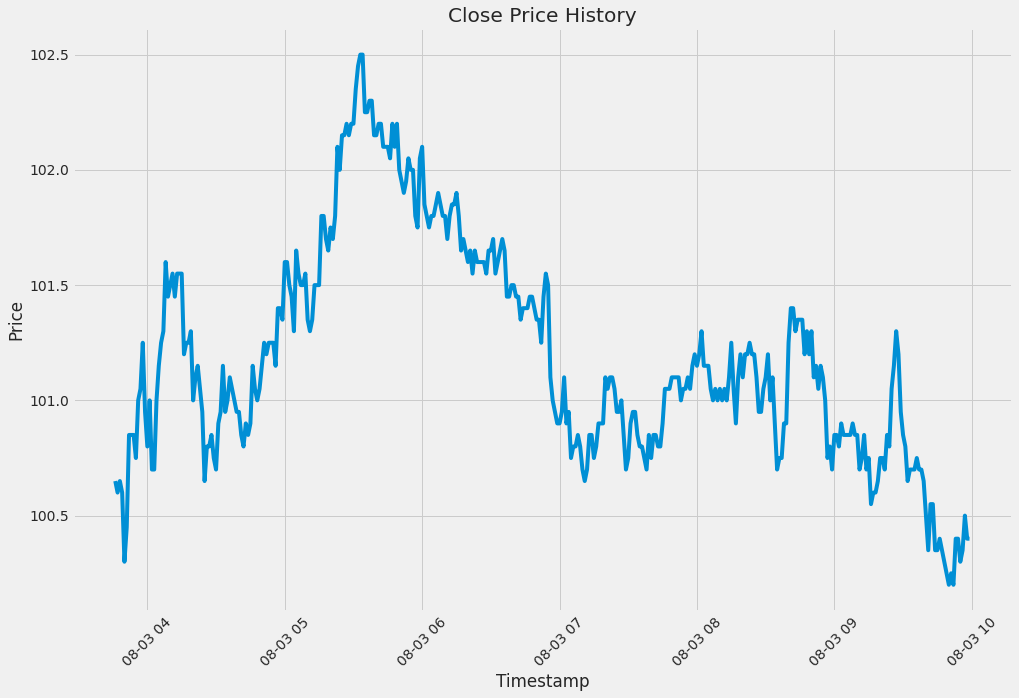

In [ ]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(df1['last_price'], label='Last Price')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the three moving averages
# Calculate the short / fast exponential moving average (EMA)
ShortEMA = df1['last_price'].ewm(span=5, adjust=False).mean()

# Calculate the Middle / Medium exponential moving average (EMA)
MiddleEMA = df1['last_price'].ewm(span=21, adjust=False).mean()

# Calculate the long/slow exponential moving average (EMA)
LongEMA = df1['last_price'].ewm(span=60, adjust=False).mean()

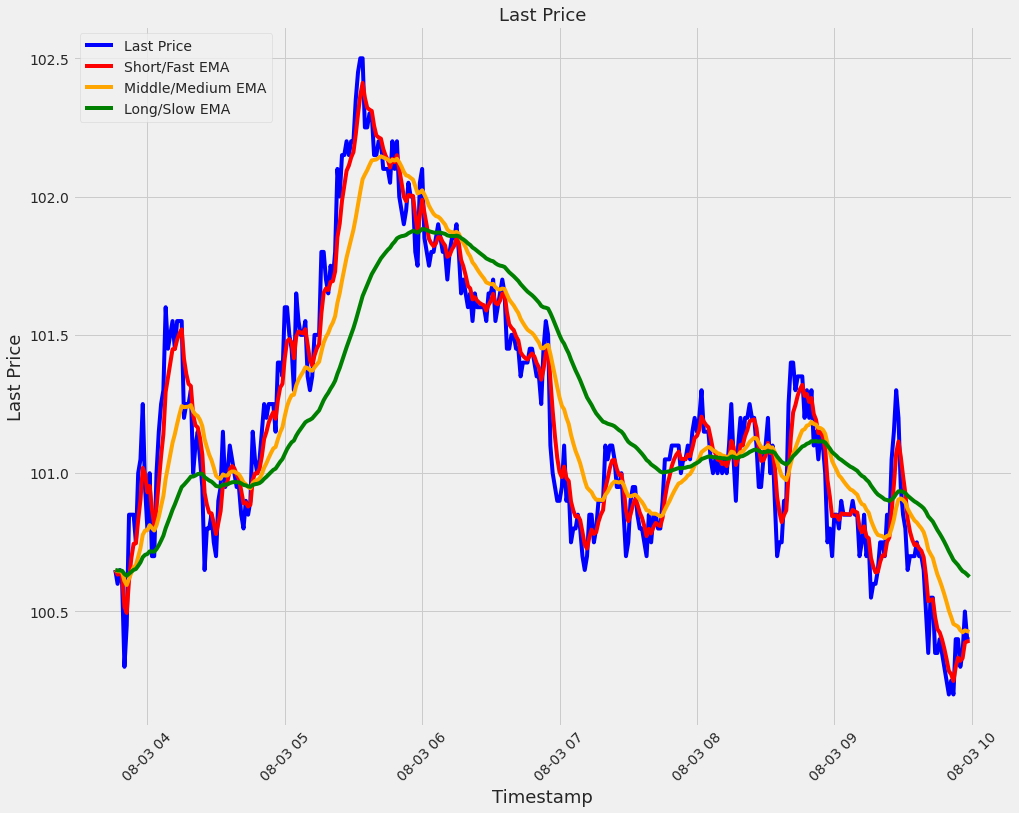

In [ ]:
# Visualize the Last Price and the exponential moving averages
plt.figure(figsize=(15,12))
plt.title('Last Price', fontsize=18)
plt.plot(df1['last_price'], label='Last Price', color='blue')
plt.plot(ShortEMA, label='Short/Fast EMA', color='red')
plt.plot(MiddleEMA, label='Middle/Medium EMA', color='orange')
plt.plot(LongEMA, label='Long/Slow EMA', color='green')
plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Add the exponential moving averages to the dataset
df1['Short'] = ShortEMA
df1['Middle'] = MiddleEMA
df1['Long'] = LongEMA
df1.head()

,timestamp,last_price,volume,scrip_id,Short,Middle,Long
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14,100.650000,100.650000,100.650000
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14,100.633333,100.645455,100.648361
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14,100.638889,100.645868,100.648414
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14,100.625926,100.641698,100.646827
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14,100.517284,100.610635,100.635456


In [ ]:
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
      
    for i in range(0, len(data)):
      if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
        buy_list.append(data['last_price'][i])
        sell_list.append(np.nan)
        flag_short = True
      elif flag_short == True and data['Short'][i] > data['Middle'][i]:
        sell_list.append(data['last_price'][i])
        buy_list.append(np.nan)
        flag_short = False
      elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
        buy_list.append(data['last_price'][i])
        sell_list.append(np.nan)
        flag_long = True
      elif flag_long == True and data['Short'][i] < data['Middle'][i]:
        sell_list.append(data['last_price'][i])
        buy_list.append(np.nan)
        flag_long = False
      else:
        buy_list.append(np.nan)
        sell_list.append(np.nan)

    return (buy_list, sell_list)

In [ ]:
# Add the buy and sell signals to the dataset
df1['Buy'] = buy_sell_function(df1)[0]
df1['Sell'] = buy_sell_function(df1)[1]

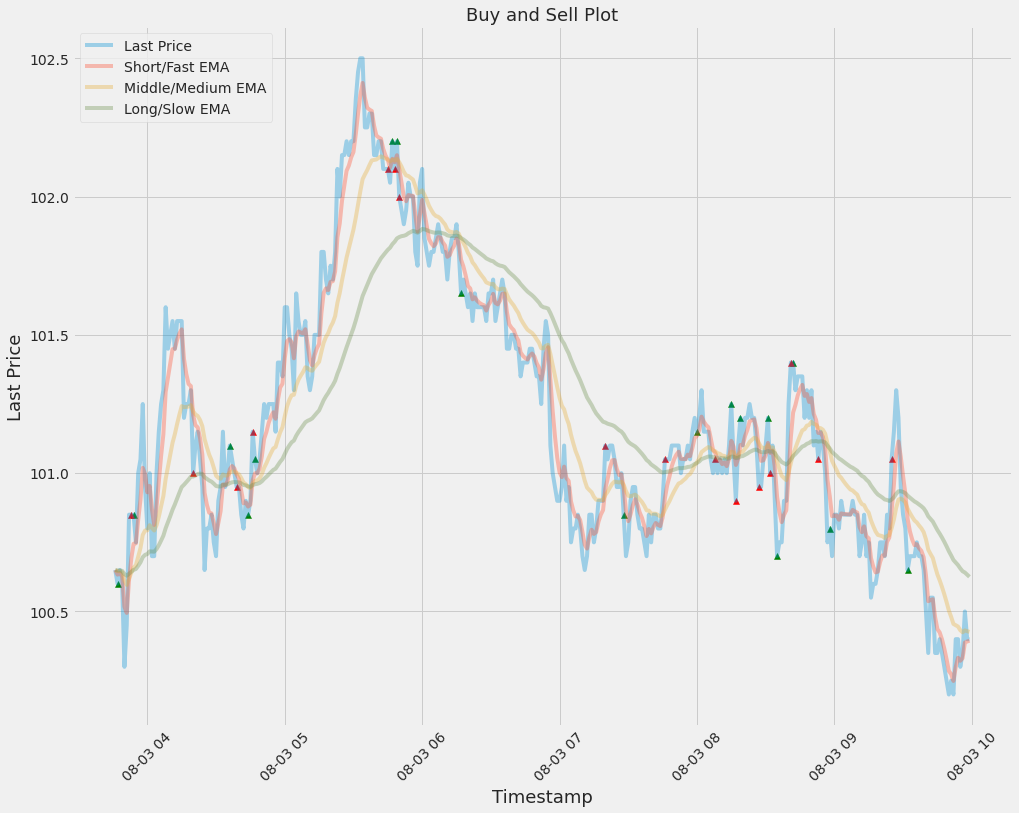

In [ ]:
# Visualize the Last Price and the exponential moving averages
plt.figure(figsize=(15,12))
plt.title('Buy and Sell Plot', fontsize=18)
plt.plot(df1['last_price'], label='Last Price', alpha=0.35)
plt.plot(ShortEMA, label='Short/Fast EMA', alpha=0.35)
plt.plot(MiddleEMA, label='Middle/Medium EMA', alpha=0.35)
plt.plot(LongEMA, label='Long/Slow EMA', alpha=0.35)
plt.scatter(df1.index, df1['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df1.index, df1['Sell'], color='red', marker='^', alpha=1)
plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

------------------------------------------------------------------

https://www.youtube.com/watch?v=SEQbb8w7VTw : Simple Moving Average

- This program uses the **Dual Moving Average** crossover to determine when to buy and sell stock.

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving streaming_stocks_data.csv to streaming_stocks_data (2).csv


In [ ]:
# Loading Stocks data
AAPL = pd.read_csv("streaming_stocks_data.csv")
AAPL.columns = ['timestamp','last_price','volume','scrip_id']
AAPL.head()

,timestamp,last_price,volume,scrip_id
0,2020-08-03 09:16:00+05:30,100.65,74643,14
1,2020-08-03 09:17:00+05:30,100.60,58859,14
2,2020-08-03 09:18:00+05:30,100.65,30118,14
3,2020-08-03 09:19:00+05:30,100.60,49734,14
4,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
AAPL = AAPL.set_index(pd.DatetimeIndex(AAPL['timestamp'].values))
AAPL.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
AAPL.shape

(7497, 4)

In [ ]:
AAPL1 = df[0:374]
AAPL1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [ ]:
AAPL1.shape

(374, 4)

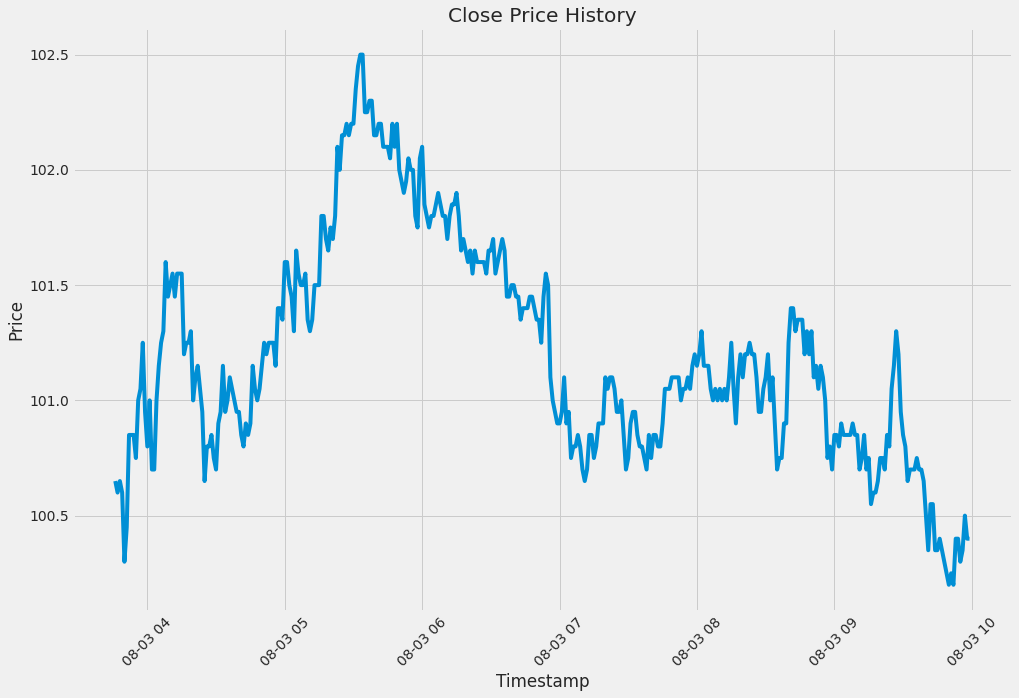

In [ ]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(AAPL1['last_price'], label='Last Price')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create the simple moving average with a 30 days window
SMA30 = pd.DataFrame()
SMA30['last_price'] = AAPL1['last_price'].rolling(window=30).mean()
SMA30

,last_price
2020-08-03 09:16:00+05:30,NaN
2020-08-03 09:17:00+05:30,NaN
2020-08-03 09:18:00+05:30,NaN
2020-08-03 09:19:00+05:30,NaN
2020-08-03 09:20:00+05:30,NaN
...,...
2020-08-03 15:25:00+05:30,100.583333
2020-08-03 15:26:00+05:30,100.556667
2020-08-03 15:27:00+05:30,100.530000
2020-08-03 15:28:00+05:30,100.503333


In [ ]:
# Create the simple moving average with a 100 days window
SMA100 = pd.DataFrame()
SMA100['last_price'] = AAPL1['last_price'].rolling(window=100).mean()
SMA100

,last_price
2020-08-03 09:16:00+05:30,NaN
2020-08-03 09:17:00+05:30,NaN
2020-08-03 09:18:00+05:30,NaN
2020-08-03 09:19:00+05:30,NaN
2020-08-03 09:20:00+05:30,NaN
...,...
2020-08-03 15:25:00+05:30,100.859
2020-08-03 15:26:00+05:30,100.852
2020-08-03 15:27:00+05:30,100.848
2020-08-03 15:28:00+05:30,100.841


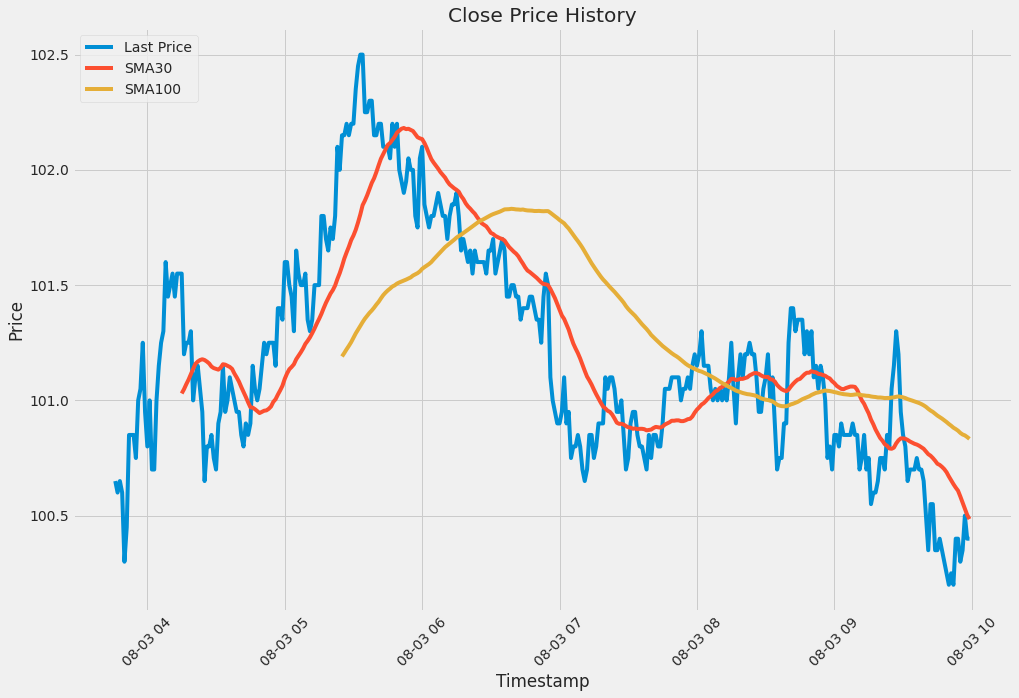

In [ ]:
# Visually show the stock price
plt.figure(figsize=(15,10))
plt.plot(AAPL1['last_price'], label='Last Price')
plt.plot(SMA30['last_price'], label='SMA30')
plt.plot(SMA100['last_price'], label='SMA100')
plt.title('Close Price History')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create a new Dataframe to store all the data
data = pd.DataFrame()
data['AAPL1'] = AAPL1['last_price']
data['SMA30'] = SMA30['last_price']
data['SMA100'] = SMA100['last_price']
data

,AAPL1,SMA30,SMA100
2020-08-03 09:16:00+05:30,100.65,NaN,NaN
2020-08-03 09:17:00+05:30,100.60,NaN,NaN
2020-08-03 09:18:00+05:30,100.65,NaN,NaN
2020-08-03 09:19:00+05:30,100.60,NaN,NaN
2020-08-03 09:20:00+05:30,100.30,NaN,NaN
...,...,...,...
2020-08-03 15:25:00+05:30,100.30,100.583333,100.859
2020-08-03 15:26:00+05:30,100.35,100.556667,100.852
2020-08-03 15:27:00+05:30,100.50,100.530000,100.848
2020-08-03 15:28:00+05:30,100.40,100.503333,100.841


In [ ]:
# Create a function to signal when to buy and sell the asset / stock
def buy_sell(data):
    sigPriceBuy = []
    sigPricesell = []
    flag = -1
      
    for i in range(len(data)):
      if data['SMA30'][i] > data['SMA100'][i]:
        if flag !=1:
          sigPriceBuy.append(data['AAPL1'][i])
          sigPricesell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)
      elif data['SMA30'][i] < data['SMA100'][i]:
        if flag !=0:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(data['AAPL1'][i])
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)
      else:
          sigPriceBuy.append(np.nan)
          sigPricesell.append(np.nan)

    return (sigPriceBuy, sigPricesell)

In [ ]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
data

,AAPL1,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
2020-08-03 09:16:00+05:30,100.65,NaN,NaN,NaN,NaN
2020-08-03 09:17:00+05:30,100.60,NaN,NaN,NaN,NaN
2020-08-03 09:18:00+05:30,100.65,NaN,NaN,NaN,NaN
2020-08-03 09:19:00+05:30,100.60,NaN,NaN,NaN,NaN
2020-08-03 09:20:00+05:30,100.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-08-03 15:25:00+05:30,100.30,100.583333,100.859,NaN,NaN
2020-08-03 15:26:00+05:30,100.35,100.556667,100.852,NaN,NaN
2020-08-03 15:27:00+05:30,100.50,100.530000,100.848,NaN,NaN
2020-08-03 15:28:00+05:30,100.40,100.503333,100.841,NaN,NaN


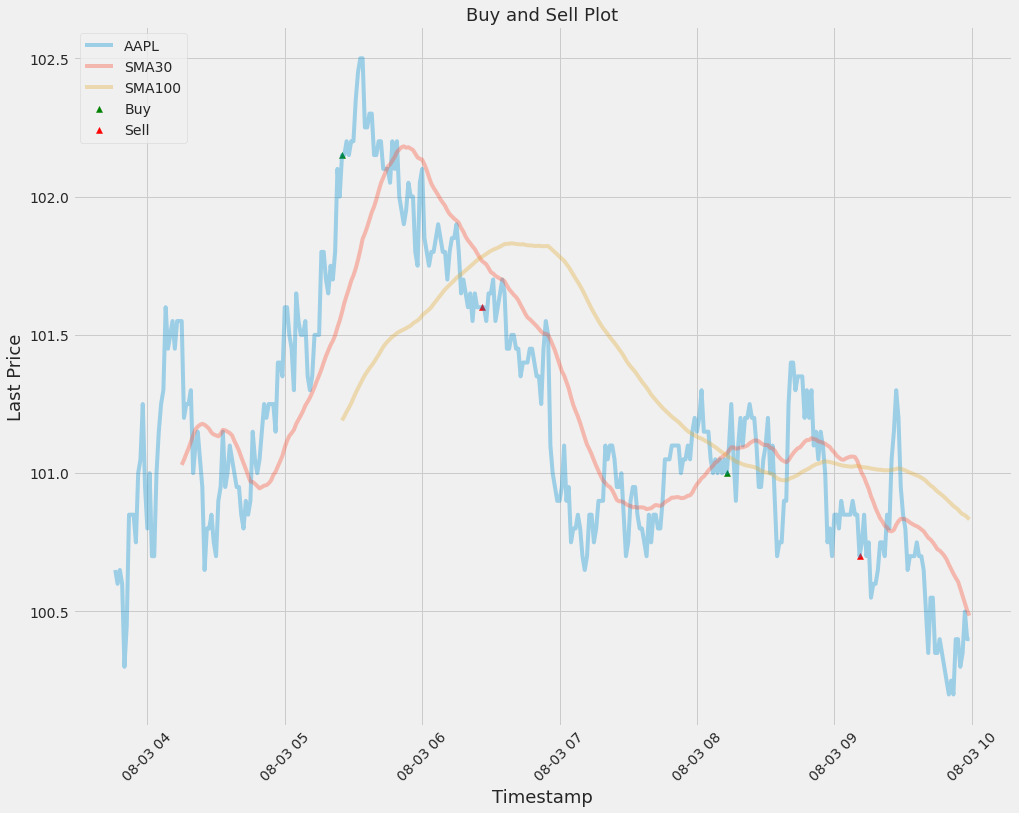

In [ ]:
# Visualize the data and strategy to buy and sell the stock
plt.figure(figsize=(15,12))
plt.plot(data['AAPL1'], label='AAPL', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', color='green', marker='^', alpha=1)
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', color='red', marker='^', alpha=1)
plt.title('Buy and Sell Plot', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Timestamp', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

------------------------

- Two other moving averages are commonly used among financial market :
   - Weighted Moving Average (WMA)
   - Exponential Moving Average (EMA)

### Weighted Moving Average

- In some applications, one of the limitations of the simple moving average is that it gives equal weight to each of the daily prices included in the window. E.g., in a 10-day moving average, the most recent day receives the same weight as the first day in the window: each price receives a 10% weighting.

- Compared to the Simple Moving Average, the Linearly Weighted Moving Average (or simply Weighted Moving Average, WMA), gives more weight to the most recent price and gradually less as we look back in time. On a 10-day weighted average, the price of the 10th day would be multiplied by 10, that of the 9th day by 9, the 8th day by 8 and so on. The total will then be divided by the sum of the weights (in this case: 55). In this specific example, the most recent price receives about 18.2% of the total weight, the second more recent 16.4%, and so on until the oldest price in the window that receives 0.02% of the weight.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

- We apply a style for our charts. If you’re using Jupyter it’s a good idea to add the %matplotlib inline instruction (and skip plt.show() when creating charts):

In [46]:
plt.style.use('fivethirtyeight')

In [47]:
from google.colab import files
uploaded = files.upload()

Saving MV EMV.csv to MV EMV (1).csv


In [63]:
from google.colab import files
uploaded = files.upload()

Saving cs movavg.csv to cs movavg.csv


In [64]:
data = pd.read_csv('MV EMV.csv', index_col = 'Date')
df = pd.read_csv('cs movavg.csv', index_col = 'Date')
data.index = pd.to_datetime(data.index)
df.index = pd.to_datetime(df.index)

In [65]:
# We can drop the old index column:
data = data.drop(columns='Unnamed: 0')
df = df.drop(columns='Unnamed: 0')

In [66]:
display(data.head(15))
display(df.head(15))

,Price
Date,
2010-03-24,22.273
2010-03-25,22.194
2010-03-26,22.085
2010-03-29,22.174
2010-03-30,22.184
2010-03-31,22.134
2010-04-01,22.234
2010-04-05,22.432
2010-04-06,22.244


,Price,10-day SMA,10-day WMA,Smoothing Constant 2/(10 + 1),10-day EMA
Date,,,,,
2010-03-24,22.273,NaN,NaN,NaN,NaN
2010-03-25,22.194,NaN,NaN,NaN,NaN
2010-03-26,22.085,NaN,NaN,NaN,NaN
2010-03-29,22.174,NaN,NaN,NaN,NaN
2010-03-30,22.184,NaN,NaN,NaN,NaN
2010-03-31,22.134,NaN,NaN,NaN,NaN
2010-04-01,22.234,NaN,NaN,NaN,NaN
2010-04-05,22.432,NaN,NaN,NaN,NaN
2010-04-06,22.244,NaN,NaN,NaN,NaN


In [67]:
(data.shape), (df.shape)

((30, 1), (30, 5))

- We are going to consider only the Price and 10-Day WMA columns for now and move to the EMA later on

In [52]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

- When it comes to linearly weighted moving averages, the pandas library does not have a ready off-the-shelf method to calculate them. It offers, however, a very powerful and flexible method: ** .apply()** This method allows us to create and pass any custom function to a rolling window: that is how we are going to calculate our Weighted Moving Average. To calculate a 10-Day WMA, we start by creating an array of weights - whole numbers from 1 to 10:

In [53]:
wma10 = data['Price'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10.head(20)

Date
2010-03-24          NaN
2010-03-25          NaN
2010-03-26          NaN
2010-03-29          NaN
2010-03-30          NaN
2010-03-31          NaN
2010-04-01          NaN
2010-04-05          NaN
2010-04-06          NaN
2010-04-07    22.246473
2010-04-08    22.233618
2010-04-09    22.266382
2010-04-12    22.293527
2010-04-13    22.356909
2010-04-14    22.547800
2010-04-15    22.843927
2010-04-16    23.050818
2010-04-19    23.244455
2010-04-20    23.434455
2010-04-21    23.535582
Name: Price, dtype: float64

--------------------------------------------------------

### Study

In [68]:
df['Our 10-day WMA'] = np.round(wma10, decimals=3)
df[['Price', '10-day WMA', 'Our 10-day WMA']].head(20)

,Price,10-day WMA,Our 10-day WMA
Date,,,
2010-03-24,22.273,NaN,NaN
2010-03-25,22.194,NaN,NaN
2010-03-26,22.085,NaN,NaN
2010-03-29,22.174,NaN,NaN
2010-03-30,22.184,NaN,NaN
2010-03-31,22.134,NaN,NaN
2010-04-01,22.234,NaN,NaN
2010-04-05,22.432,NaN,NaN
2010-04-06,22.244,NaN,NaN


- The two WMA columns look the same. There are a few differences in the third decimal place, but we can put that down to rounding error and conclude that our implementation of the WMA is correct. In a real-life application, if we want to be more rigorous we should compute the differences between the two columns and check that they are not too large. For now, we keep things simple and we can be satisfied with the visual inspection.

----------------------------------------

In [56]:
sma10 = data['Price'].rolling(10).mean()
data['10-day SMA'] = np.round(sma10, decimals=3)

In [59]:
data['10-day WMA'] = np.round(wma10, decimals=3)
data[['Price', '10-day SMA', '10-day WMA']].head(20)

,Price,10-day SMA,10-day WMA
Date,,,
2010-03-24,22.273,NaN,NaN
2010-03-25,22.194,NaN,NaN
2010-03-26,22.085,NaN,NaN
2010-03-29,22.174,NaN,NaN
2010-03-30,22.184,NaN,NaN
2010-03-31,22.134,NaN,NaN
2010-04-01,22.234,NaN,NaN
2010-04-05,22.432,NaN,NaN
2010-04-06,22.244,NaN,NaN


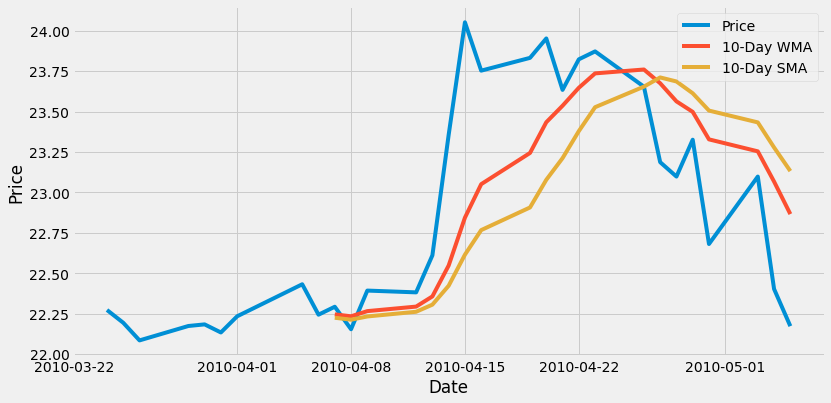

In [61]:
plt.figure(figsize = (12,6))
plt.plot(data['Price'], label="Price")
plt.plot(data['10-day WMA'], label="10-Day WMA")
plt.plot(data['10-day SMA'], label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

- As we can see, both averages smooth out the price movement. The WMA is more reactive and follows the price closer than the SMA: we expect that since the WMA gives more weight to the most recent price observations. Also, both moving average series start on day 10: the first day with enough available data to compute the averages.

-------------------------------------------------

### Exponential Moving Average

- Similarly to the Weighted Moving Average, the Exponential Moving Average (EMA) assigns a greater weight to the most recent price observations. While it assigns lesser weight to past data, it is based on a recursive formula that includes in its calculation all the past data in our price series.

- Pandas includes a method to compute the EMA moving average of any time series: .ewm().

In [62]:
ema10 = data['Price'].ewm(span=10).mean()
ema10.head(10)

Date
2010-03-24    22.273000
2010-03-25    22.229550
2010-03-26    22.171442
2010-03-29    22.172285
2010-03-30    22.175648
2010-03-31    22.164830
2010-04-01    22.181498
2010-04-05    22.238488
2010-04-06    22.239687
2010-04-07    22.250886
Name: Price, dtype: float64

In [69]:
df['Our 10-day EMA'] = np.round(ema10, decimals=3)
df[['Price', '10-day EMA', 'Our 10-day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA
Date,,,
2010-03-24,22.273,NaN,22.273
2010-03-25,22.194,NaN,22.230
2010-03-26,22.085,NaN,22.171
2010-03-29,22.174,NaN,22.172
2010-03-30,22.184,NaN,22.176
2010-03-31,22.134,NaN,22.165
2010-04-01,22.234,NaN,22.181
2010-04-05,22.432,NaN,22.238
2010-04-06,22.244,NaN,22.240


- As you have already noticed, we have a problem here: the 10-day EMA that we just calculated does not correspond to the one calculated in the downloaded spreadsheet. One starts on day 10, while the other starts on day 1. Also, the values do not match exactly.

- Is our calculation wrong? Or is the calculation in the provided spreadsheet wrong? Neither: those two series correspond to two different definitions of EMA. To be more specific, the formula used to compute the EMA is the same. What changes is just the use of the initial values.

- If we look carefully at the definition of Exponential Moving Average on the StockCharts.com web page we can notice one important detail: they start calculating a 10-day moving average on day 10, disregarding the previous days and replacing the price on day 10 with its 10-day SMA. It’s a different definition than the one applied when we calculated the EMA using the .ewm() method directly.

- The following lines of code create a new modified price series where the first 9 prices (when the SMA is not available) are replaced by NaN and the price on the 10th date becomes its 10-Day SMA:

In [71]:
modPrice = df['Price'].copy()
modPrice.iloc[0:10] = sma10[0:10]
modPrice.head(20)

Date
2010-03-24        NaN
2010-03-25        NaN
2010-03-26        NaN
2010-03-29        NaN
2010-03-30        NaN
2010-03-31        NaN
2010-04-01        NaN
2010-04-05        NaN
2010-04-06        NaN
2010-04-07    22.2247
2010-04-08    22.1540
2010-04-09    22.3930
2010-04-12    22.3820
2010-04-13    22.6110
2010-04-14    23.3560
2010-04-15    24.0520
2010-04-16    23.7530
2010-04-19    23.8320
2010-04-20    23.9520
2010-04-21    23.6340
Name: Price, dtype: float64

- We can use this modified price series to calculate a second version of the EWM. By looking at the documentation, we can note that the .ewm() method has an adjust parameter that defaults to True. This parameter adjusts the weights to account for the imbalance in the beginning periods (if you need more detail, see the Exponentially weighted windows section in the pandas documentation).

- If we want to emulate the EMA as in our spreadsheet using our modified price series, we don’t need this adjustment. We then set adjust=False:

In [72]:
ema10alt = modPrice.ewm(span=10, adjust=False).mean()

In [73]:
df['Our 2nd 10-Day EMA'] = np.round(ema10alt, decimals=3)
df[['Price', '10-day EMA', 'Our 10-day EMA', 'Our 2nd 10-Day EMA']].head(20)

,Price,10-day EMA,Our 10-day EMA,Our 2nd 10-Day EMA
Date,,,,
2010-03-24,22.273,NaN,22.273,NaN
2010-03-25,22.194,NaN,22.230,NaN
2010-03-26,22.085,NaN,22.171,NaN
2010-03-29,22.174,NaN,22.172,NaN
2010-03-30,22.184,NaN,22.176,NaN
2010-03-31,22.134,NaN,22.165,NaN
2010-04-01,22.234,NaN,22.181,NaN
2010-04-05,22.432,NaN,22.238,NaN
2010-04-06,22.244,NaN,22.240,NaN


- Now, we are doing much better. We have obtained an EMA series that matches the one calculated in the spreadsheet.

- We ended up with two different versions of EMA in our hands:

  **1. ema10:** This version uses the plain .ewm() method, starts at the beginning of our price history but does not match the definition used in the spreadsheet.

  **2. ema10alt:** This version starts on day 10 (with an initial value equal to the 10-day SMA) and matches the definition on our spreadsheet.

- Which one is the best to use? The answer is: it depends on what we need for our application and to build our system. If we need an EMA series that starts from day 1, then we should choose the first one. On the other hand, if we need to use our average in combination with other averages that have no values for the initial days (such as the SMA), then the second is probably the best one.

- The second EMA is widely used among financial market analysts: if we need to implement an already existing system, we need to be careful to use the correct definition. Otherwise, the results may not be what is expected from us and may put the accuracy of all of our work into question. In any case, the numeric difference between those two averages is minimal, with an impact on our trading or investment decision system limited to the initial days.

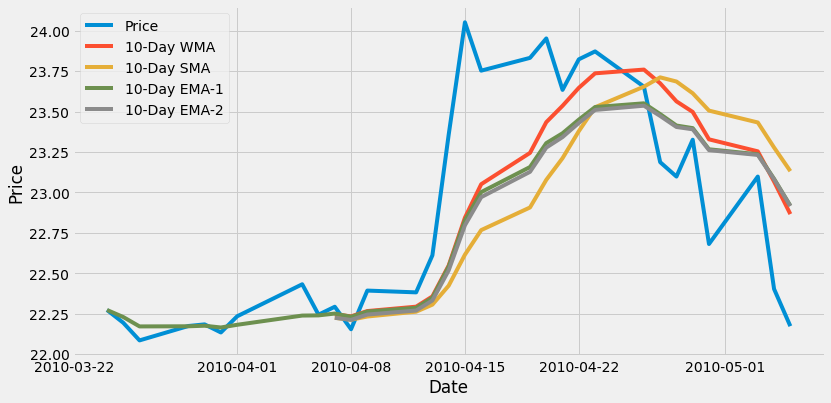

In [74]:
plt.figure(figsize = (12,6))
plt.plot(df['Price'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.plot(ema10, label="10-Day EMA-1")
plt.plot(ema10alt, label="10-Day EMA-2")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

- Of all the moving averages, the WMA appears the one that is more responsive and tags the price more closely, while the SMA is the one that responds with some more lag. The two versions of the EMA tend to overlap each other, mainly in the last days.